In [1]:
# %load_ext watermark

In [2]:
# %watermark -v

Python implementation: CPython
Python version       : 3.10.7
IPython version      : 8.2.0



## Recipe 65 -Aggregate transactional data in time windows 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# load the appliances energy prediction data set

cols = ['date', 'Appliances', 'lights']

data = pd.read_csv('energydata_complete.csv', usecols=cols)

data.head()

,date,Appliances,lights
0,2016-01-11 17:00:00,60,30
1,2016-01-11 17:10:00,60,30
2,2016-01-11 17:20:00,50,30
3,2016-01-11 17:30:00,50,40
4,2016-01-11 17:40:00,60,40


In [5]:
data.dtypes

date          object
Appliances     int64
lights         int64
dtype: object

In [6]:
data.shape

(19735, 3)

Text(0, 0.5, 'Number of rows')

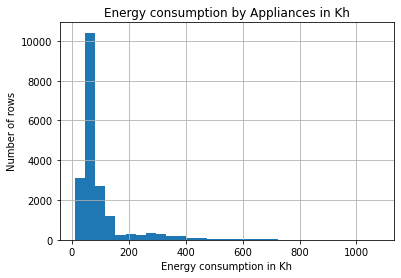

In [7]:
# Make histogram of electirivy consumption by appliances

data['Appliances'].hist(bins=30)
plt.title('Energy consumption by Appliances in Kh')
plt.xlabel('Energy consumption in Kh')
plt.ylabel('Number of rows')

Text(0, 0.5, 'Number of rows')

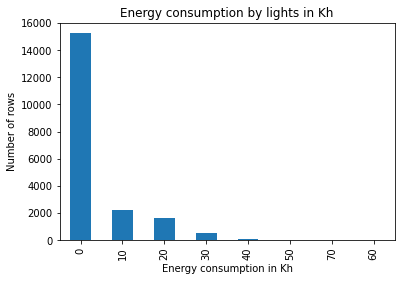

In [8]:
# Make histogram of electirivy consumption by lights

data['lights'].value_counts().plot.bar()
plt.title('Energy consumption by lights in Kh')
plt.xlabel('Energy consumption in Kh')
plt.ylabel('Number of rows')

In [9]:
# check maximun and minimum dates
data['date'].agg(['min', 'max'])

min    2016-01-11 17:00:00
max    2016-05-27 18:00:00
Name: date, dtype: object

In [10]:
# parse the date column as datetime data type

data['date'] = pd.to_datetime(data['date'])

Text(0.5, 1.0, 'Energy consumption by Appliances in time')

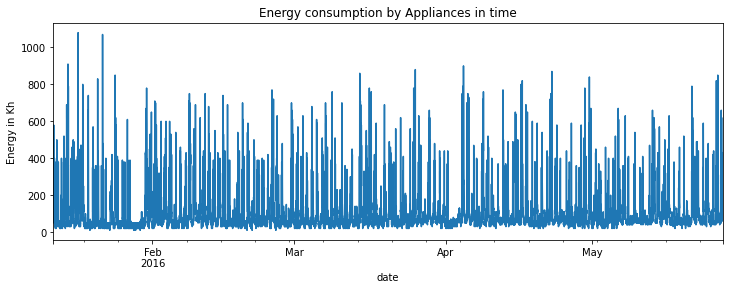

In [11]:
# plot consumption per timepoint by appliances

# I create a copy of the dataframe, not to alter the original dataframe structure
# which s the one I will use in the recipe in the book

tmp = data.copy()
tmp.index = tmp['date']

tmp['Appliances'].plot(figsize=(12, 4))
plt.ylabel('Energy in Kh')
plt.title('Energy consumption by Appliances in time')

Text(0.5, 1.0, 'Energy consumption by lights in time')

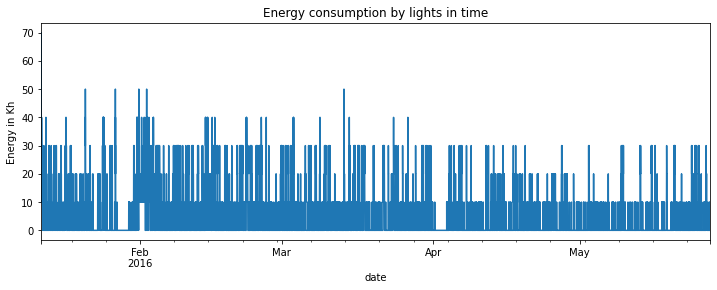

In [12]:
# plot consumption per timepoint by lights

tmp['lights'].plot(figsize=(12,4))
plt.ylabel('Energy in Kh')
plt.title('Energy consumption by lights in time')

Text(0.5, 1.0, 'Energy consumption by lights in time')

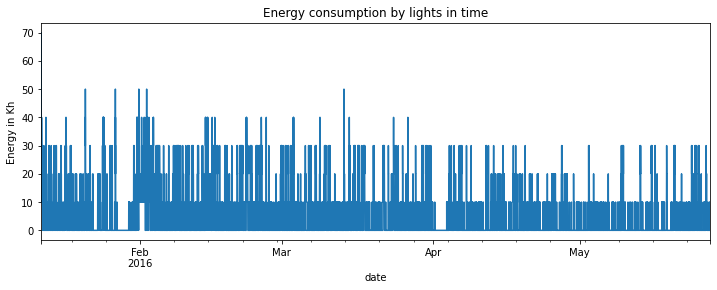

In [13]:
# plot consumption per timepoint by lights

tmp['lights'].plot(figsize=(12,4))
plt.ylabel('Energy in Kh')
plt.title('Energy consumption by lights in time')

## Determine statistical parameters per hr
### Single operation

In [14]:
# aggregate the data in 60 min views
# the value displayed by the features represents the average of
# the current and 5 precedent rows of data

data_rolled = data.rolling(window=6, on='date').mean()

data_rolled.head(10)

,date,Appliances,lights
0,2016-01-11 17:00:00,NaN,NaN
1,2016-01-11 17:10:00,NaN,NaN
2,2016-01-11 17:20:00,NaN,NaN
3,2016-01-11 17:30:00,NaN,NaN
4,2016-01-11 17:40:00,NaN,NaN
5,2016-01-11 17:50:00,55.000000,35.000000
6,2016-01-11 18:00:00,55.000000,38.333333
7,2016-01-11 18:10:00,55.000000,41.666667
8,2016-01-11 18:20:00,56.666667,43.333333
9,2016-01-11 18:30:00,60.000000,43.333333


In [15]:
# same as previous but with a different implementation of the window argument
# instead of averaging the previous 6 rows, now we indicate a time period
# pandas rolling will use the date variable to determine the periods

data_rolled = data.rolling(window='60min', on='date', min_periods=6).mean()

data_rolled.head(10)

,date,Appliances,lights
0,2016-01-11 17:00:00,NaN,NaN
1,2016-01-11 17:10:00,NaN,NaN
2,2016-01-11 17:20:00,NaN,NaN
3,2016-01-11 17:30:00,NaN,NaN
4,2016-01-11 17:40:00,NaN,NaN
5,2016-01-11 17:50:00,55.000000,35.000000
6,2016-01-11 18:00:00,55.000000,38.333333
7,2016-01-11 18:10:00,55.000000,41.666667
8,2016-01-11 18:20:00,56.666667,43.333333
9,2016-01-11 18:30:00,60.000000,43.333333


### Multiple built-in operations

In [16]:
# now let's create multiple summaries in for every 60 min window

# make a list of the operations we want to perform
operations = ['sum', 'max', 'min', 'mean', 'median', 'std']

In [17]:
# create a dictionary with the operations to apply to each variable
# in this example we will apply all operations to both variables

op_dict = {key: operations for key in ['Appliances', 'lights']}
op_dict

{'Appliances': ['sum', 'max', 'min', 'mean', 'median', 'std'],
 'lights': ['sum', 'max', 'min', 'mean', 'median', 'std']}

In [18]:
# create the aggregations

data_rolled = data.set_index('date').rolling(window='60min').agg(op_dict)

data_rolled.head(10)

Appliances                                         lights  \
                           sum   max   min       mean median       std    sum   
date                                                                            
2016-01-11 17:00:00       60.0  60.0  60.0  60.000000   60.0       NaN   30.0   
2016-01-11 17:10:00      120.0  60.0  60.0  60.000000   60.0  0.000000   60.0   
2016-01-11 17:20:00      170.0  60.0  50.0  56.666667   60.0  5.773503   90.0   
2016-01-11 17:30:00      220.0  60.0  50.0  55.000000   55.0  5.773503  130.0   
2016-01-11 17:40:00      280.0  60.0  50.0  56.000000   60.0  5.477226  170.0   
2016-01-11 17:50:00      330.0  60.0  50.0  55.000000   55.0  5.477226  210.0   
2016-01-11 18:00:00      330.0  60.0  50.0  55.000000   55.0  5.477226  230.0   
2016-01-11 18:10:00      330.0  60.0  50.0  55.000000   55.0  5.477226  250.0   
2016-01-11 18:20:00      340.0  60.0  50.0  56.666667   60.0  5.163978  260.0   
2016-01-11 18:30:00      360.0  70.0  50.0  60.000000   60.0  6.324555  260.0   

                                                             
                      max   min       mean median       std  
date                                                         
2016-01-11 17:00:00  30.0  30.0  30.000000   30.0       NaN  
2016-01-11 17:10:00  30.0  30.0  30.000000   30.0  0.000000  
2016-01-11 17:20:00  30.0  30.0  30.000000   30.0  0.000000  
2016-01-11 17:30:00  40.0  30.0  32.500000   30.0  5.000000  
2016-01-11 17:40:00  40.0  30.0  34.000000   30.0  5.477226  
2016-01-11 17:50:00  40.0  30.0  35.000000   35.0  5.477226  
2016-01-11 18:00:00  50.0  30.0  38.333333   40.0  7.527727  
2016-01-11 18:10:00  50.0  30.0  41.666667   40.0  7.527727  
2016-01-11 18:20:00  50.0  40.0  43.333333   40.0  5.163978  
2016-01-11 18:30:00  50.0  40.0  43.333333   40.0  5.163978

## There is more
### User defined operations

In [19]:
from scipy.signal import find_peaks

In [20]:
def find_no_peaks(x):
    peaks, _ = find_peaks(x)
    return len(peaks)

def find_no_valleys(x):
    valleys, _ = find_peaks(1/x)
    return len(valleys)

In [21]:
# calculate number of local minima and maxima per day
# ==> more or less 144 time intervals represent 24 hs

data_rolled = data.set_index('date').rolling(window=144).agg([find_no_peaks, find_no_valleys])

In [22]:
for row in range(144, 1440, 144):
    print(data_rolled.iloc[[row]])

                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-12 17:00:00          25.0            26.0          14.0   

                                     
                    find_no_valleys  
date                                 
2016-01-12 17:00:00            13.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-13 17:00:00          33.0            32.0          11.0   

                                     
                    find_no_valleys  
date                                 
2016-01-13 17:00:00            10.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                    

In [23]:
# alternative implementation specifically indicating 1 day 
# in the window argument

data_rolled = data.set_index('date').rolling(window='1d').agg([find_no_peaks, find_no_valleys])

In [24]:
for row in range(144, 1440, 144):
    print(data_rolled.iloc[[row]])

                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-12 17:00:00          25.0            26.0          14.0   

                                     
                    find_no_valleys  
date                                 
2016-01-12 17:00:00            13.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-13 17:00:00          33.0            32.0          11.0   

                                     
                    find_no_valleys  
date                                 
2016-01-13 17:00:00            10.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                    

In [25]:
# determine the percentage change in value between consecutive observations

data_rolled = data.set_index('date')[['Appliances', 'lights']].pct_change()

data_rolled.head(10)

,Appliances,lights
date,,
2016-01-11 17:00:00,NaN,NaN
2016-01-11 17:10:00,0.000000,0.000000
2016-01-11 17:20:00,-0.166667,0.000000
2016-01-11 17:30:00,0.000000,0.333333
2016-01-11 17:40:00,0.200000,0.000000
2016-01-11 17:50:00,-0.166667,0.000000
2016-01-11 18:00:00,0.200000,0.250000
2016-01-11 18:10:00,0.000000,0.000000
2016-01-11 18:20:00,0.000000,-0.200000


## Recipe 66 Aggregating & counting local maximums, minimums 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [27]:
# load the appliances energy prediction data set

data = pd.read_csv('energydata_complete.csv')

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [28]:
# check maximun and minimum dates
data['date'].agg(['min', 'max'])

min    2016-01-11 17:00:00
max    2016-05-27 18:00:00
Name: date, dtype: object

In [29]:
# check the data type of the date variable
data['date'].dtypes

dtype('O')

In [30]:
# extract datetime derived features

# parse as datetime data type
data['date'] = pd.to_datetime(data['date'])

# new feature names
cols = ['day', 'month', 'hr']

# create the date and time features
data[cols] = pd.DataFrame([(x.day, x.month, x.hour) for x in data['date']])

data[['date', 'Appliances', 'lights'] + cols].head()

,date,Appliances,lights,day,month,hr
0,2016-01-11 17:00:00,60,30,11,1,17
1,2016-01-11 17:10:00,60,30,11,1,17
2,2016-01-11 17:20:00,50,30,11,1,17
3,2016-01-11 17:30:00,50,40,11,1,17
4,2016-01-11 17:40:00,60,40,11,1,17


In [31]:
# inspect month
data['month'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [32]:
# make the datetime variable the index of the series

data.index = data['date']

Text(0.5, 1.0, 'Daily Cycle of Energy Consumption by Appliances')

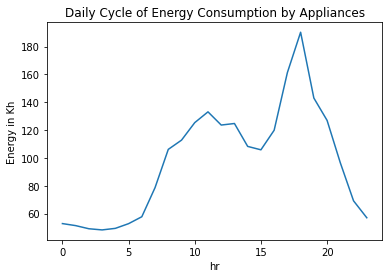

In [33]:
# Explore mean energy consumption by appliances
# per hr of the day throughout the 5 months

data.groupby('hr')['Appliances'].mean().plot()
plt.ylabel('Energy in Kh')
plt.title('Daily Cycle of Energy Consumption by Appliances')

During the night, where there is no human activity, there is a baseline energy consumption of about less than 60 Wh. We will use that value later on as the minimum value for the peaks.

Text(0.5, 1.0, 'Mean daily Energy Consumption')

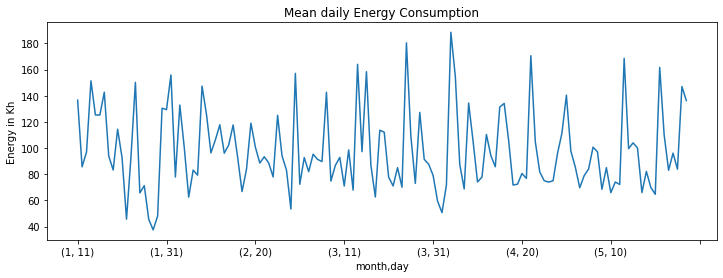

In [34]:
# Plot mean energy consumption by appliances per day
# throughout the 5 months

# we are going to work with this data

data.groupby(['month', 'day'])['Appliances'].mean().plot(figsize=(12, 4))
plt.ylabel('Energy in Kh')
plt.title('Mean daily Energy Consumption')

In [35]:
# create a pandas series with the mean energy consumed by appliances
# per day throughout the 5 months

daily_ec = data.groupby(['month', 'day'])['Appliances'].mean()

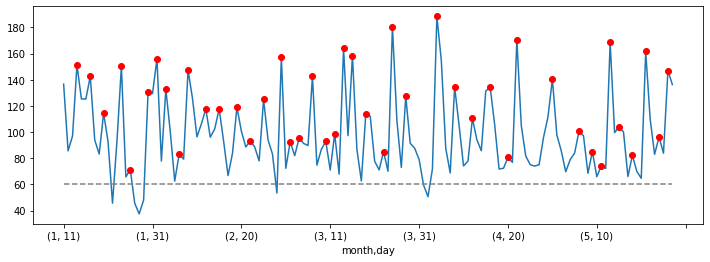

In [36]:
# Determine the days of peak electricity consumption
# throughout the 5 months
# that is, find the local maxima

# find the peaks (local maxima)
# returns an array with the location of the maxima in the pandas
# series
peaks, _ = find_peaks(daily_ec, height=60)

# plot the peaks
#---------------
plt.figure(figsize=(12, 4))

# plot the time series with the mean energy consumed per day
daily_ec.plot()

# Overlay on top of the time series a series of red dots,
# at the location of the local maxima, using the peak variable
# for the x coordinate and the value of the peak for the y coordinate
plt.plot(peaks, daily_ec.values[peaks], "o", color='red')

# add a line at the baseline electricity consumption of 60 Kh
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")

# display the plot
plt.show()

In [37]:
# peaks contains the indeces of the array
# with the days of maximum electricity consumption
peaks

array([  3,   6,   9,  13,  15,  19,  21,  23,  26,  28,  32,  35,  39,
        42,  45,  49,  51,  53,  56,  59,  61,  63,  65,  68,  72,  74,
        77,  84,  88,  92,  96, 100, 102, 110, 116, 119, 121, 123, 125,
       128, 131, 134, 136], dtype=int64)

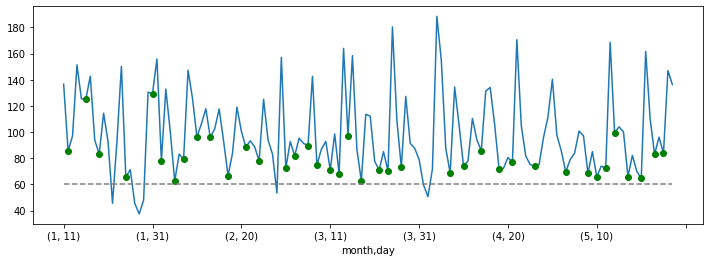

In [38]:
# determine the days of minimum electricity consumption
# throughout the 5 months
# that is, the local minima

# we use the same function, find_peaks, which means that we need to 
# turn the time series upside-dowm, which we do with the reciprocal function
valleys, _ = find_peaks(1 / daily_ec, height=(0, 1/60))

# plot the local minima
plt.figure(figsize=(12, 4))

# plot the time series with the mean energy consumed per day
daily_ec.plot()

# Overlay on top of the time series a series of green dots,
# at the location of the local minima, using the valleys variable
# for the x coordinate and the value of the local minima for the y coordinate
plt.plot(valleys, daily_ec.values[valleys], "o", color='green')

# add a line at the baseline electricity consumption
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")
plt.show()

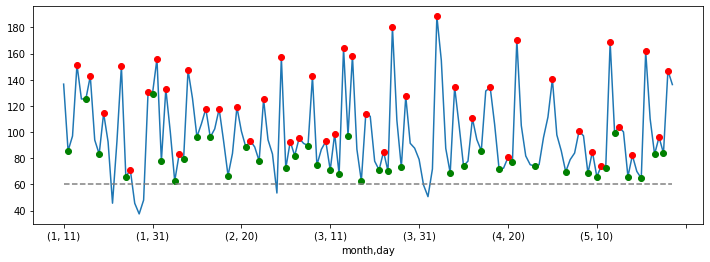

In [39]:
# now, let's determine both local minima and maxima
# and overlay them in a plot

peaks, _ = find_peaks(daily_ec, height=60)
valleys, _ = find_peaks(1 / daily_ec, height=(0, 1/60))

plt.figure(figsize=(12, 4))
daily_ec.plot()
plt.plot(peaks, daily_ec.values[peaks], "o", color='red')
plt.plot(valleys, daily_ec.values[valleys], "o", color='green')
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")
plt.show()

## There is more

What if we have more than one instance, for example, various customers with multiple time-series?

In [40]:
import featuretools as ft

# let's load the example data set from feature tools
data_dict = ft.demo.load_mock_customer()

data = data_dict["transactions"].merge(
    data_dict["sessions"]).merge(data_dict["customers"])

cols = ['customer_id',
        'transaction_id',
        'transaction_time',
        'amount',
        ]

data = data[cols]

data.head()

,customer_id,transaction_id,transaction_time,amount
0,2,298,2014-01-01 00:00:00,127.64
1,2,2,2014-01-01 00:01:05,109.48
2,2,308,2014-01-01 00:02:10,95.06
3,2,116,2014-01-01 00:03:15,78.92
4,2,371,2014-01-01 00:04:20,31.54


In [41]:
data['transaction_time'].agg(['min', 'max'])

min   2014-01-01 00:00:00
max   2014-01-01 09:00:35
Name: transaction_time, dtype: datetime64[ns]

In [42]:
data['transaction_time'].dtypes

dtype('<M8[ns]')

In [43]:
# let's create a feature with the hour of the transaction

data['hr'] = data['transaction_time'].dt.hour

data.head()

,customer_id,transaction_id,transaction_time,amount,hr
0,2,298,2014-01-01 00:00:00,127.64,0
1,2,2,2014-01-01 00:01:05,109.48,0
2,2,308,2014-01-01 00:02:10,95.06,0
3,2,116,2014-01-01 00:03:15,78.92,0
4,2,371,2014-01-01 00:04:20,31.54,0


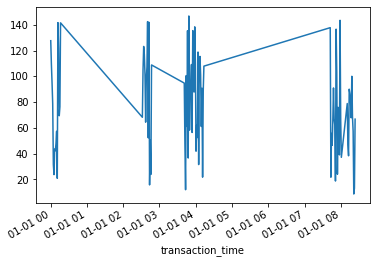

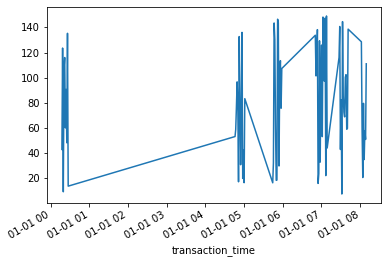

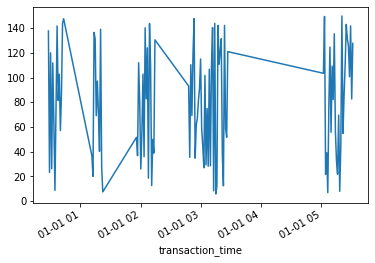

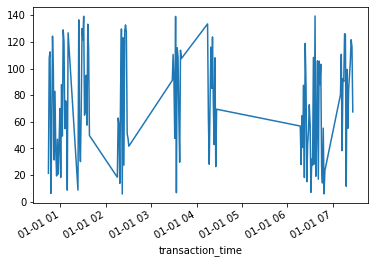

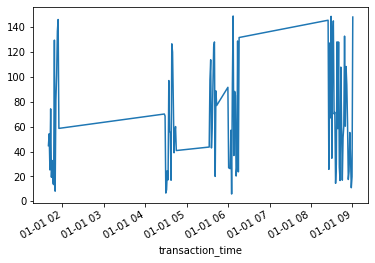

In [44]:
# let's plot the amount per transaction ==>
# one plot per customer
# this step is not in the book

for customer in data['customer_id'].unique():

    # make a small df with one customer
    tmp = data[data['customer_id'] == customer]

    # add the transaction time as index
    tmp.index = tmp['transaction_time']

    # plot the amount spent in time
    tmp['amount'].plot()
    plt.show()

In [45]:
# let's create a function that finds a plots
# the local maxima of a customer amount spent
# per transaction time series

# this function and following cell are not in the book

# x is a pandas series
def find_and_plot_peaks(x, customer):

    # find local maxima
    peaks, _ = find_peaks(x)

    # plot the peaks
    plt.figure(figsize=(4, 3))
    plt.plot(x.values)
    plt.plot(peaks, x.values[peaks], "x")
    plt.title('Customer number {}'.format(customer))
    plt.show()

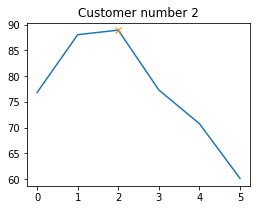

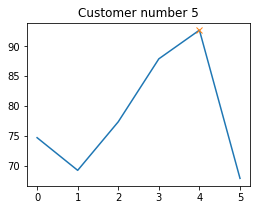

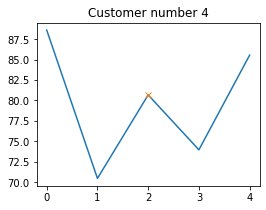

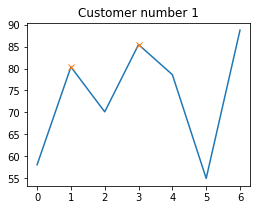

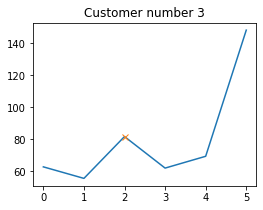

In [46]:
# now let's plot the local maxima for the time series with 
# the mean amount spent per hour ==>

# one plot per customer

# this code is intended to get the reader familiar with the data
# and therefore facilitate the understanding of the recipe code

for customer in data['customer_id'].unique():
    
    # small df with a single customer data
    tmp = data[data['customer_id']==customer]
    
    # aggregate the mean amount spent per hr
    tmp = tmp.groupby('hr')['amount'].mean()
    pd.DataFrame(tmp).reset_index(inplace=True, drop=False)
    
    # find and plot the local maxima
    find_and_plot_peaks(tmp, customer)


In [47]:
# create functions that take a time series
# and return number of local maxima or local minima


def find_no_peaks(x):
    peaks, _ = find_peaks(x)
    return len(peaks)


def find_no_valleys(x):
    valleys, _ = find_peaks(1/x)
    return len(valleys)

In [48]:
# select a single customer data to test function

tmp = data[data['customer_id'] == 3]
tmp = tmp.groupby('hr')['amount'].mean()
tmp

hr
1     62.791333
4     55.579412
5     81.747500
6     62.019333
8     69.403939
9    148.310000
Name: amount, dtype: float64

In [49]:
# test local maxima function

find_no_peaks(tmp)

1

In [50]:
# test local minima function

find_no_valleys(tmp)

2

In [51]:
# find number of local maxima in all customers

data.groupby(['customer_id', 'hr'])['amount'].mean().groupby(
    'customer_id').apply(find_no_peaks)

customer_id
1    2
2    1
3    1
4    1
5    1
Name: amount, dtype: int64

In [52]:
# find both local maxima and minima in all customers

data.groupby(['customer_id', 'hr'])['amount'].mean().groupby(
    'customer_id').agg([find_no_peaks, find_no_valleys])

,find_no_peaks,find_no_valleys
customer_id,,
1,2,2
2,1,0
3,1,2
4,1,2
5,1,1


## Recipe 67 Calculate distance betwen events 

In [53]:
from scipy.signal import find_peaks

In [54]:
# load the appliances energy prediction data set

data = pd.read_csv('energydata_complete.csv')

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [55]:
# parse as datetime data type

data['date'] = pd.to_datetime(data['date'])

In [56]:
# determine time between transactions, in this case, energy records

data['time_since_previous'] = data['date'].diff()

data['time_since_previous'] = data['time_since_previous']/np.timedelta64(1,'m')

data[['date', 'time_since_previous']].head(10)

,date,time_since_previous
0,2016-01-11 17:00:00,NaN
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,10.0
3,2016-01-11 17:30:00,10.0
4,2016-01-11 17:40:00,10.0
5,2016-01-11 17:50:00,10.0
6,2016-01-11 18:00:00,10.0
7,2016-01-11 18:10:00,10.0
8,2016-01-11 18:20:00,10.0
9,2016-01-11 18:30:00,10.0


In [57]:
# extract day and month from datetime variable

data[['day', 'month']] = pd.DataFrame([(x.day, x.month) for x in data['date']])

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,time_since_previous,day,month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,NaN,11,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,10.0,11,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,10.0,11,1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,10.0,11,1
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,10.0,11,1


In [58]:
# make the datetime variable the index of the series

data.index = data['date']

<AxesSubplot:xlabel='month,day'>

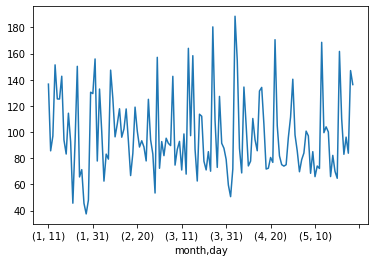

In [59]:
# Plot mean energy consumption by appliances per day
# we are going to work with this data

data.groupby(['month', 'day'])['Appliances'].mean().plot()

<AxesSubplot:xlabel='month,day'>

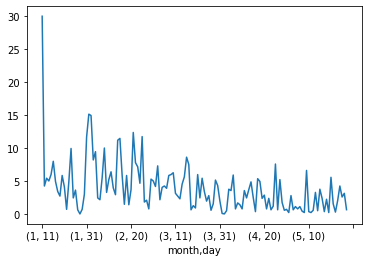

In [60]:
# Plot mean energy consumption by lights per day
# we are going to work with this data

data.groupby(['month', 'day'])['lights'].mean().plot()

In [83]:
# create pandas series with the mean energy consumption per day

# electricity consumption by appliances per day

# elec_pday = data.groupby(['month', 'day'])['Appliances'].mean()

elec_pday = data.groupby(['month', 'day'])['Appliances'].mean()
elec_pday2 = data.groupby(['month', 'day'])

# light energy consumption per day
light_pday = data.groupby(['month', 'day'])['lights'].mean()

In [94]:
from tabulate import tabulate
elec_pday2_vals = elec_pday2['Appliances'].mean()
elec_pday2.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,time_since_previous,day,month
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,...,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,NaN,11,1
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,...,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,10.0,11,1
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,...,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,10.0,11,1
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.890000,...,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,10.0,11,1
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,...,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,10.0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 00:00:00,2016-05-27 00:00:00,60,10,24.323333,44.560000,23.128571,43.897143,26.79,39.363333,24.890000,...,756.100000,79.000000,3.000000,63.000000,11.100000,14.009098,14.009098,10.0,27,5
2016-05-27 00:10:00,2016-05-27 00:10:00,70,0,24.356667,44.730000,23.100000,44.036000,26.79,39.433333,24.890000,...,756.066667,79.166667,2.833333,62.833333,11.083333,21.646274,21.646274,10.0,27,5
2016-05-27 00:20:00,2016-05-27 00:20:00,50,10,24.356667,44.790000,23.042857,44.090000,26.79,39.522500,24.890000,...,756.033333,79.333333,2.666667,62.666667,11.066667,26.865136,26.865136,10.0,27,5


In [95]:
elec_pday2_vals

month  day
1      11     136.666667
       12      85.694444
       13      97.013889
       14     151.388889
       15     125.347222
                 ...    
5      23      83.055556
       24      96.180556
       25      83.888889
       26     147.013889
       27     136.330275
Name: Appliances, Length: 138, dtype: float64

In [96]:
# find the peaks, that is, the local maxima

peaks, _ = find_peaks(elec_pday.values, height=60)

peaks.shape

(43,)

In [116]:
tmp = pd.DataFrame(elec_pday2_vals)
tmp.reset_index(drop=False)
tmp['year'] = 2016

In [120]:
tmp.sample(20)

Appliances  year
month day                  
2     24    77.986111  2016
1     13    97.013889  2016
5     25    83.888889  2016
      22   110.138889  2016
3     20   112.152778  2016
1     23    93.055556  2016
4     9    105.208333  2016
3     27    73.055556  2016
      10    92.916667  2016
4     13    94.236111  2016
2     15   117.708333  2016
      17    66.805556  2016
      29   157.152778  2016
3     1     72.361111  2016
4     2     50.694444  2016
5     2     85.625000  2016
      27   136.330275  2016
      18    82.222222  2016
4     18    71.805556  2016
3     2     92.777778  2016

In [122]:
tmp.columns

KeyError: 'month'

In [121]:
# reconstitute the datetime variable

tmp['date'] = pd.to_datetime(tmp[['year', 'month', 'day']])

tmp.head()

KeyError: "['month', 'day'] not in index"

In [99]:
elec_pday2_vals.values[peaks]

array([151.38888889, 142.70833333, 114.44444444, 150.27777778,
        71.31944444, 130.48611111, 155.90277778, 132.91666667,
        83.19444444, 147.36111111, 117.84722222, 117.70833333,
       119.09722222,  93.40277778, 125.06944444, 157.15277778,
        92.77777778,  95.34722222, 142.63888889,  92.91666667,
        98.61111111, 164.02777778, 158.40277778, 113.68055556,
        85.06944444, 180.41666667, 127.29166667, 188.54166667,
       134.44444444, 110.41666667, 134.16666667,  80.625     ,
       170.625     , 140.41666667, 100.76388889,  85.06944444,
        74.09722222, 168.61111111, 104.02777778,  82.22222222,
       161.66666667,  96.18055556, 147.01388889])

In [66]:
# compare the shape of the time series with that of the selected
# local maxima series

# elec_pday.shape
elec_pday.values[peaks[1]]

142.70833333333334

In [67]:
peaks

array([  3,   6,   9,  13,  15,  19,  21,  23,  26,  28,  32,  35,  39,
        42,  45,  49,  51,  53,  56,  59,  61,  63,  65,  68,  72,  74,
        77,  84,  88,  92,  96, 100, 102, 110, 116, 119, 121, 123, 125,
       128, 131, 134, 136], dtype=int64)

In [73]:
# reconstitute the datetime variable

tmp['date'] = pd.to_datetime(tmp[['year', 'month', 'day']])

tmp.head()

KeyError: "['month', 'day'] not in index"